done2
BIC:  -423873.2486107866
it: 0
done2
BIC:  -425383.682451172
it: 1
done2
BIC:  -443842.52389554447
it: 2
done2
BIC:  -443128.32830779493
it: 3
done2
BIC:  -434071.13186317
it: 4
done2
BIC:  -413379.40756472526
it: 5
done2
BIC:  -426001.53427531023
it: 6
done2
BIC:  -443569.69502502226
it: 7
done2
BIC:  -420406.70718075684
it: 8
done2
BIC:  -430200.79389277747
it: 9
done2
BIC:  -419652.25669068017
it: 10
done2
BIC:  -432294.3395557986
it: 11
done2
BIC:  -436189.43295883655
it: 12
done2
BIC:  -430793.8579299643
it: 13
done2
BIC:  -433873.3534251968
it: 14
done2
BIC:  -444761.78312585014
it: 15
done2
BIC:  -437389.0583455277
it: 16
done2
BIC:  -433375.9552909439
it: 17
done2
BIC:  -432170.7927757482
it: 18
done2
BIC:  -425681.06288912817
it: 19
done2
BIC:  -426245.41815743287
it: 20
done2
BIC:  -432776.70141467114
it: 21
done2
BIC:  -391829.3253498318
it: 22
done2
BIC:  -417324.9270414415
it: 23
done2
BIC:  -446862.06515989144
it: 24
average time 8.525366344451903
-429803.0953271201

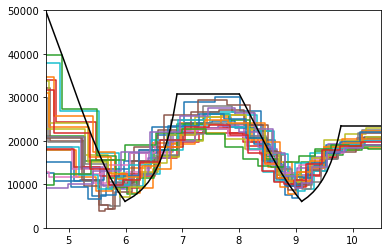

In [25]:
############ sam_size = 200 #############


import statistics
import msprime
from IPython.display import SVG, display
import tsinfer
import scipy
import math
import numpy
import tskit
import io
import builtins
import sys
from tqdm.notebook import tqdm
from tskit import MISSING_DATA
import pickle
import random
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoLarsIC
from sklearn.linear_model import LassoLarsIC
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import matrix, spmatrix, sparse
from cvxopt.solvers import qp, options
from cvxopt import blas
from cvxopt import spdiag
import statsmodels
from statsmodels.nonparametric.kernel_regression import KernelReg
from scipy.signal import savgol_filter
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
import time




import bisect
def find_s(elem, sorted_list):
    'Locate the leftmost value exactly equal to x'
    i = bisect.bisect_left(sorted_list, elem)
    if i != len(sorted_list) and sorted_list[i] == elem:
        return i


def find_s_se(elem, sorted_list):
    'Locate the leftmost value smaller or equal to x'
    i = bisect.bisect_right(sorted_list, elem)
    if i != 0:
        return i-1
    else:
        print("error")


def find_s_s(elem, sorted_list):
    'Locate the leftmost value smaller or equal to x'
    i = bisect.bisect_left(sorted_list, elem)
    if i != 0:
        return i
    else:
        return 0
    
def est_mu_map_fun(mu_ave,site_pos_sort,est_mu_map_num_inter,seq_len):
    inter = numpy.linspace(0,seq_len,est_mu_map_num_inter+1)
    cur_num_l = 0
    num_mu_int = numpy.zeros(len(inter)-1)
    for k in range(1,len(inter)):
        cur_num_r = find_s_s(inter[k], site_pos_sort )
        num_mu_int[k-1] = cur_num_r-cur_num_l
        cur_num_l = cur_num_r
    est_mu_rate = num_mu_int/( inter[1:] - inter[0: (len(inter)-1)]   )   
    est_mu_rate = est_mu_rate/sum(est_mu_rate)*mu_ave*est_mu_map_num_inter
    return([inter,est_mu_rate])
        


seq_len = 10**7
sam_size = 100

pop_size_con = 10000
r_con = 10**(-8)

epsilon = 0.00001
gene_conver = 2*10**(-8)
track_len = 300

########
mu_map_unknown = 1
mu_ave = 1.3*10**(-8)
est_mu_map_num_inter = 10
##########


c_value = 2.6*10**(-4)
c1=200

totaliter=25
# numchromosome = 1
# numsimtree = 1
numtildet = 20



########################## Demographic model #########################################

pop_ini_size = 50000
demo_model = msprime.Demography.isolated_model([pop_ini_size], growth_rate=[0.007])
demo_model.add_population_parameters_change(400,  initial_size=None, growth_rate= -0.0027, population=None)
demo_model.add_population_parameters_change(1000,  initial_size=None, growth_rate= 0, population=None)
demo_model.add_population_parameters_change(3000,  initial_size=None, growth_rate= 0.00027, population=None)
demo_model.add_population_parameters_change(9000,  initial_size=None, growth_rate= -0.00015, population=None)
demo_model.add_population_parameters_change(18000,  initial_size=None, growth_rate= 0, population=None)




# pop_size = 50000
# demo_model = msprime.Demography.isolated_model([pop_size], growth_rate=[0.007])
# demo_model.add_population_parameters_change(400,  initial_size=None, growth_rate= -0.0027, population=None)
# demo_model.add_population_parameters_change(1000,  initial_size=None, growth_rate= 0, population=None)
# demo_model.add_population_parameters_change(3000,  initial_size=None, growth_rate= 0.00027, population=None)
# demo_model.add_population_parameters_change(9000,  initial_size=None, growth_rate= -0.00009, population=None)
# demo_model.add_population_parameters_change(30000,  initial_size=None, growth_rate= 0, population=None)



# pop_ini_size = 50000
# demo_model = msprime.Demography.isolated_model([pop_ini_size], growth_rate=[0.00575])
# demo_model.add_population_parameters_change(400,  initial_size=None, growth_rate= -0.001, population=None)
# demo_model.add_population_parameters_change(1800,  initial_size=None, growth_rate= 0.0002, population=None)
# demo_model.add_population_parameters_change(9000,  initial_size=None, growth_rate= -0.000068, population=None)
# demo_model.add_population_parameters_change(30000,  initial_size=None, growth_rate= 0, population=None)




############################## r map ######################################

# r_map = 10**(-8)

r_map = msprime.RateMap(
    position=[0, 10**6, 2*10**6, 3*10**6, 4*10**6, 5*10**6, 6*10**6, 7*10**6, 8*10**6, 9*10**6, 10*10**6],
    rate=[0.5*10**(-8), 1.5*10**(-8), 0.5*10**(-8), 1.5*10**(-8), 0.5*10**(-8), 1.5*10**(-8), 0.5*10**(-8)\
         , 1.5*10**(-8), 0.5*10**(-8), 1.5*10**(-8)]
)

############################ mu map         ###################################
################################################################################



# mu_map = 1.3*10**(-8)
mu_map = msprime.RateMap(
    position=[0,  2*10**6,  4*10**6,  6*10**6, 8*10**6,  10*10**6],
    rate=[0.7*10**(-8), 1*10**(-8), 1.3*10**(-8), 1.6*10**(-8), 1.9*10**(-8)]
)





#demo_model = msprime.Demography.isolated_model([pop_size], growth_rate=[10**(-4)])

lamd = []
Ntlist = []
investlist = []
biclist=[]
sum_time = 0
for it in range(totaliter):

####### observe #########
    ts1 = msprime.sim_ancestry(
        samples=sam_size,
        recombination_rate= r_map, 
        sequence_length= seq_len,
#         population_size = pop_size,
        gene_conversion_rate = gene_conver ,
        gene_conversion_tract_length = track_len,
        #random_seed = seed,
#         discrete_genome=False,
        demography = demo_model
        )
    # Visualise the simulated ancestral history.
    #SVG(ts.draw_svg())

    #ts.num_trees


    mts1 = msprime.sim_mutations(ts1, rate = mu_map,
                                discrete_genome=False,
                                #random_seed=seed
                               )
    
    #print(iter,"done generating")

    
    s_time = time.time()
    
    if mu_map_unknown == 1:
        site_pos_sort = mts1.tables.sites.position
        aa = est_mu_map_fun(mu_ave,site_pos_sort,est_mu_map_num_inter,seq_len)
        mu_map = msprime.RateMap(position=aa[0].tolist(), rate=aa[1].tolist())

    
    if isinstance(mu_map, float) ==1:
        seq_bp = [*range(0,seq_len, int(c_value/mu_map) )]
        seq_bp.append(seq_len)
        seq_bp=numpy.array(seq_bp)
    else:
        seq_bp = [0]
        current_seq_site = 0
        need_cum_rate = c_value
        for i in range(len(mu_map.right)):
            current_mu_change_point = mu_map.right[i]
            current_mu_map_rate = mu_map.rate[i]
            while need_cum_rate/current_mu_map_rate <= (current_mu_change_point - current_seq_site):
                seq_bp.append(current_seq_site + need_cum_rate/current_mu_map_rate)
                current_seq_site = seq_bp[-1]
                need_cum_rate = c_value
            need_cum_rate = need_cum_rate - (current_mu_change_point - current_seq_site)*current_mu_map_rate
            current_seq_site = current_mu_change_point
        if seq_bp[-1] != seq_len:
            seq_bp.append(seq_len)
        seq_bp = numpy.array(seq_bp)


                  ###### Compute the weighted average mu of each interval ###########
    mu_in_interval = c_value / ( seq_bp[1:] - seq_bp[0:(len(seq_bp)-1)] )


    ################################################################################
    

    ################################################################################

    ts = msprime.sim_ancestry(
        samples=sam_size,
        recombination_rate= r_con, 
        sequence_length= seq_len,
        population_size = pop_size_con,
#         random_seed =simtree+1026,
#         discrete_genome=False,
        #demography = demo_model
        )
    # Visualise the simulated ancestral history.
    #SVG(ts.draw_svg())

    #ts.num_trees


    mts = msprime.sim_mutations(ts, rate = mu_map,
                                discrete_genome=False,
#                                 random_seed=simtree+1026
                               )

    #print(iter,"done generating")
    
    
#### new improvement ######################################### 
    
    mu_time = mts.tables.mutations.time
    mu_site_id = mts.tables.mutations.site
    mu_site = mts.tables.sites.position[mu_site_id]
    mu_node = mts.tables.mutations.node
    mufreq = numpy.zeros(len(mu_time))
    rate_nomu = numpy.zeros( (len(seq_bp)-1)*(2*sam_size-1) )
    rate_mu = numpy.zeros( (len(seq_bp)-1)*(2*sam_size-1) )
    timevec_all = numpy.zeros( (len(seq_bp)-1)*(2*sam_size-1) )
    current_seq_int = 0
    current_site = seq_bp[0]
    current_interval_r = seq_bp[1]
    current_rate_nomu = numpy.zeros(2*sam_size-1)
    freqtime = mu_time

    
    #####################################################
    ######################################################
    ######################################################
    ######################################################
    #####################################################



    tildetcheckm1 = []
    for i in range(1,numtildet-1):
        tildetcheckm1.append( numpy.sort(freqtime)[int(len(freqtime)/numtildet*i)])
    tildetcheck = tildetcheckm1 + [max(freqtime)]

#   自己决定tildetcheck    
#     tildetcheck = [20, 50, 90, 140, 200, 500, 900, 1400, 2000, 5000, 9000, 14000, 20000, 50000, 90000 ]
#     if tildetcheck[-1] < max(freqtime):
#         tildetcheck = tildetcheck+[max(freqtime)]
    
    
          

    time_bp = numpy.array(tildetcheck[0:(len(tildetcheck)-1) ] )   
    
    mu_index = 0
    for tree in mts.trees():
        for each_mu in tree.mutations():
            mufreq[mu_index] = tree.num_samples(each_mu.node)
            mu_index = mu_index+1


        ## pairs (i, i+1)
        tree_high = numpy.zeros(2*sam_size-1)
        for i in range(2*sam_size-1):
            ## pairs (i, i+1)
            tree_high[i] = 2*tree.tmrca(i,i+1)     
        tree_lp = tree.interval[0]
        tree_rp = tree.interval[1]


        while tree_rp >= current_interval_r:
            rate_nomu[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ] = current_rate_nomu + \
                                                                    tree_high*(current_interval_r - current_site)
            timevec_all[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ] = \
                rate_nomu[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ]\
                /(seq_bp[current_seq_int+1] - seq_bp[current_seq_int] )/2
            if isinstance(mu_map, float) ==1 :
                rate_mu[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ] = \
                rate_nomu[ current_seq_int*(2*sam_size-1) :(current_seq_int+1)*(2*sam_size-1) ]*mu_map
            else:
                rate_mu[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ] = \
                rate_nomu[ current_seq_int*(2*sam_size-1) :(current_seq_int+1)*(2*sam_size-1) ]*mu_in_interval[current_seq_int]
            current_site = current_interval_r
            current_rate_nomu = numpy.zeros(2*sam_size-1)
            if current_site != seq_bp[-1]:
                current_seq_int = current_seq_int+1
                current_interval_r = seq_bp[current_seq_int+1]
            else:
                break


        current_rate_nomu = current_rate_nomu + tree_high*(tree_rp - current_site)
        current_site = tree_rp

############################################################################ 
    
    if len(mufreq) != len(freqtime):
        print("something is wrong")

############################################################################ 
    

    
    


    nummuwithin_obs =  mts1.allele_frequency_spectrum(polarised=True, span_normalise=False)[1:]

    #########################################################################################


    
    ##############################################################################################


    
    freqtsortbytime = numpy.transpose(sorted(numpy.transpose(numpy.array([freqtime,mufreq])).tolist()))
    freqtimes = freqtsortbytime[0]
    mufreqs = freqtsortbytime[1]

    tinterval = numpy.zeros(len(freqtimes))
    curint = 0
    tiltind = 0
    curtimett = tildetcheck[tiltind]
    for i in range(len(freqtimes)):
        if freqtimes[i] <= curtimett:
            tinterval[i] = curint
        else:
            tiltind = tiltind + 1
            curtimett = tildetcheck[tiltind]
            while curtimett<freqtimes[i]:
                curint = curint + 1
                tiltind = tiltind + 1
                curtimett = tildetcheck[tiltind]
                
            curint = curint + 1
            tinterval[i] = curint

    tinterval = tinterval.astype(int)
    ##############################################################

####### new improvement ############

    afs = numpy.zeros( (len(seq_bp)-1) *(2*sam_size-1) )
    for i in range(2*sam_size-1):
        current_afs_all = mts1.allele_frequency_spectrum(sample_sets = [[i,i+1]], polarised=True, \
                                                    windows = seq_bp, span_normalise=False)
        current_afs = current_afs_all[:,1]
        index = i + numpy.array( [*range(len(seq_bp)-1)]) * (2*sam_size-1)
        afs[index] = current_afs + numpy.random.poisson( ( seq_bp[1:]-seq_bp[:(len(seq_bp) -1)] )*epsilon*2 )


    print("done2")     


    afs_sort = numpy.sort(afs)
    sortindex = numpy.argsort(rate_mu)
    rate_mu_sort = rate_mu[sortindex]
    timevec_all_sort = timevec_all[sortindex]
    
#############################################################################################
##############################################################################################


    Xmat = numpy.zeros( (len(nummuwithin_obs),  max(tinterval)+1)   )
    Xmat = Xmat.astype("float64")

    infreqint = numpy.zeros(len(mufreqs))
    for i in range(len(mufreqs)):
        infreqint[i] =  mufreqs[i]-1 
    infreqint = infreqint.astype(int)

    lenf = len(nummuwithin_obs)
    for i in range(len(mufreqs)):
        a1 = infreqint[i] 
        a2 = tinterval[i]
        if a1 < lenf:
            Xmat[a1][a2] = Xmat[a1][a2] + 1


    Ymat = numpy.array(nummuwithin_obs)
    Ymat = Ymat.astype("float64")
    
    
####### new improvement ############
    
####### new improvement ############
    
    
    Xmat_new = numpy.zeros((len(rate_mu_sort), len(time_bp)+1 )) 
    for i in range(len(timevec_all_sort)):
        current_time = timevec_all_sort[i]
        current_rate = rate_mu_sort[i]
        index = find_s_s(current_time,time_bp)
        if index==0:
            Xmat_new[i,index] = current_rate
        else:
            Xmat_new[i,0]  = current_rate * time_bp[0]/current_time
            Xmat_new[i,1:index] = current_rate * (time_bp[1:index]-time_bp[0:(index-1)])/current_time
            Xmat_new[i,index] = current_rate * (current_time - time_bp[index-1]) / current_time

#### density deconvolution
    Ymat_obs = afs_sort        
    yvec = numpy.arange(min(Ymat_obs) , min( min(Ymat_obs) +  len(Ymat_obs),  max(Ymat_obs)+1) )
    den_mean = numpy.zeros(len(yvec))
    den_obs = numpy.zeros(len(yvec))
    for i in range(len(yvec)):
        val = yvec[i]
        den_obs[i] = ( find_s_s(val+1,Ymat_obs) - find_s_s(val,Ymat_obs) ) / len(Ymat_obs)
    find_den_x_mat = numpy.zeros( (len(den_mean),len(yvec)) )
    for i in range(len(find_den_x_mat)):
        val = yvec[i]
        find_den_x_mat[i] = scipy.stats.poisson.pmf(val,mu=yvec)
    find_den_y_mat = den_obs
    lm = LinearRegression(fit_intercept=False,positive = True)
    lm.fit(find_den_x_mat,find_den_y_mat)    
    den_mean = lm.coef_
    cdf_mean = numpy.cumsum(den_mean)
    quan_vec =  numpy.arange(1,len(Xmat_new)+1)   /(len(Xmat_new) +1 )
    Ymat_new = numpy.zeros(len(Xmat_new))
    for i in range(len(quan_vec)):
        yloc = find_s_s(quan_vec[i],cdf_mean)
        if yloc==0:
            Ymat_new[i] = yvec[yloc ] + quan_vec[i]/(cdf_mean[yloc]  ) 
        elif yloc == len(cdf_mean):
            Ymat_new[i] = yvec[yloc-1] + (quan_vec[i]-cdf_mean[-1])/(1-cdf_mean[-1])
        else:
            Ymat_new[i] = yvec[yloc ] + (quan_vec[i] - cdf_mean[yloc-1])/(cdf_mean[yloc] - cdf_mean[yloc-1] ) 



#     Xmat_new = Xmat_new[0:3000]
#     Ymat_new = Ymat_new[0:3000]
    
##############################################################################################





####### combine #############################################################

####### weight Xmat_new so that it has equal importance to Xmat

    Xmat_new = Xmat_new*numpy.sqrt( c1/len(Xmat_new) )
    Ymat_new = Ymat_new*numpy.sqrt( c1/len(Ymat_new) )

    if epsilon > 0:
        Xmat = Xmat[1:]
        Ymat = Ymat[1:]
    
    Xmat_combine = numpy.concatenate((Xmat, Xmat_new), axis=0)
    Ymat_combine = numpy.concatenate((Ymat, Ymat_new))
#     Xmat_combine = Xmat_new
#     Ymat_combine = Ymat_new


    
    
## weighted least square
    Xfit = numpy.zeros( (len(Xmat_combine[:,0]),len(Xmat_combine[0,:]) ) )
    Yfit = numpy.zeros(len(Ymat_combine))
    for i in range(len(Ymat_combine)):
#         Xfit[i,:] = Xmat_combine[i,:]/(sum(Xmat_combine[i,:])+1)
#         Yfit[i] = Ymat_combine[i]/(sum(Xmat_combine[i,:])+1)
#         Xfit[i,:] = Xmat_combine[i,:]/(sum(Xmat_combine[i,:])+1)/(numpy.sqrt( Ymat_combine[i]+1) / (sum(Xmat_combine[i,:])+1) )
#         Yfit[i] = Ymat_combine[i]/(sum(Xmat_combine[i,:])+1)/ (numpy.sqrt( Ymat_combine[i]+1) / (sum(Xmat_combine[i,:])+1) )
        Xfit[i,:] = Xmat_combine[i,:]/numpy.sqrt(Ymat_combine[i]+1)
        Yfit[i] = Ymat_combine[i]/numpy.sqrt(Ymat_combine[i]+1)
        
### Lasso #############################################################

 
# ### Lasso #############################################################

#     Xuse = numpy.zeros( (len(Xfit[:,0]),len(Xfit[0,:]) ) )
#     Yuse = Yfit
#     for i in range(len(Xuse[0,:])):
#         Xuse[:,i] = numpy.sum(Xfit[:,i:],1)


#     Xuse2 = numpy.zeros( (len(Xuse[:,0]),len(Xuse[0,:]) ) )
#     Yuse2 = Yuse
#     for i in range(len(Xuse2[0,:])):
#         Xuse2[:,i] = numpy.sum(Xuse[:,i:],1)

#     correctfactor = 10000*sum( abs(Xuse2[:,0] ) + abs(Xuse2[:,1]) )
#     Xuse2[:,0] = Xuse2[:,0]*correctfactor
#     Xuse2[:,1] = Xuse2[:,1]*correctfactor

#     Xuse2 = Xuse2[1:,:]
#     Yuse2 = Yuse2[1:]

# ##         fitmodel = Lasso(alpha = 0.00005,fit_intercept=False,max_iter= 100000000)   
# ##         fitmodel = LassoCV(fit_intercept=False,max_iter= 100000000)   

# #     fitmodel = LassoLarsIC(criterion='bic',fit_intercept=False,max_iter= 100000000)  
# #     fitmodel.fit(Xuse2,Yuse2)
# #     if fitmodel.alpha_ < minlamd:
# #         fitmodel = Lasso(alpha = minlamd,fit_intercept=False,max_iter= 100000000)  
# #         fitmodel.fit(Xuse2,Yuse2)
# #         lamd.append(minlamd)
# #     else:
# #         lamd.append(fitmodel.alpha_)
    
#     current_lambda = 5*10**4
#     fitmodel = Ridge(alpha=current_lambda, fit_intercept=False, max_iter= 10000)
#     fitmodel.fit(Xuse2,Yuse2)
#     if current_lambda < minlamd:
#         fitmodel = Ridge(alpha = minlamd,fit_intercept=False,max_iter= 10000)  
#         fitmodel.fit(Xuse2,Yuse2)
#         lamd.append(minlamd)
#     else:
#         lamd.append(current_lambda)
        

#     sol2 = fitmodel.coef_
#     sol1 = [correctfactor*sol2[0] ]
#     sol1.append( correctfactor*(sol2[1] + sol2[0]) )
#     for i in range(2,len(sol2)):        
#         sol1.append(sol2[i]+sol1[i-1])



#     sol = [sol1[0] ]
#     for i in range(1,len(sol1)):        
#         sol.append(sol1[i]+sol[i-1])
#     print(sol2)
#     print(sol)



# # ######################################################################


########################### penalyse difference of slopes ######

    current_lambda = 1*10**2

    PXmat = numpy.zeros((len(Xmat_new[0])-2, len(Xmat_new[0]) ))
    
    It_list = numpy.array(tildetcheck)
    It_list[1:] = numpy.array(tildetcheck[1:])-numpy.array(tildetcheck[0:(len(tildetcheck)-1)])
    
    ### weighting beta by time gap ########################
    for i in range(len(PXmat)):
        PXmat[i,i] =  numpy.sqrt(current_lambda)*(1)
        PXmat[i,i+1] = numpy.sqrt(current_lambda)*( -2 ) 
        PXmat[i,i+2] = numpy.sqrt(current_lambda)*(1)

    PYmat = numpy.zeros(len(Xmat_new[0])-2)

    Xfit1 = numpy.concatenate((Xfit, PXmat), axis=0)
    Yfit1 = numpy.concatenate((Yfit, PYmat), axis=0)
    
    fitmodel = LinearRegression(fit_intercept=False,positive = True)

    fitmodel.fit(Xfit1,Yfit1)    
    sol = fitmodel.coef_
    
# correct the last term:
    sol[-1]= 2*sol[-2] - sol[-3]  
    
#############################

    rss = sum((numpy.matmul(Xfit,sol)-Yfit)**2)
    aa = numpy.matmul(numpy.transpose(Xfit1),Xfit1)
    bb= numpy.linalg.inv(aa)
    cc = numpy.matmul(Xfit,bb)
    df = sum(sum(cc*Xfit))
    bic = len(Xfit)*numpy.log(rss/len(Xfit)) + df*numpy.log(len(Xfit))
    print("BIC: ",bic)
    biclist.append(bic)
#############################




    tcheck = [sol[0]*tildetcheck[0] ]
    for i in range(1,len(tildetcheck)):
        tcheck.append(tcheck[i-1] + sol[i]*(tildetcheck[i] - tildetcheck[i-1] )  )


    #############################################################################
    
    invest = []
    invest.append(0)
    Nt = []
    for i in range(len(tcheck)-1):
        Nt.append(sol[i]*pop_size_con*2)
        Nt.append(sol[i]*pop_size_con*2)
        invest.append(tcheck[i])
        invest.append(tcheck[i])
    Nt.append(sol[-1]*pop_size_con*2)
    Nt.append(sol[-1]*pop_size_con*2)
    invest.append(tcheck[-1])

    Ntlist.append(Nt)  
    investlist.append(invest)
    print("it:",it)


    e_time = time.time()
    
    sum_time = sum_time + e_time-s_time 
    
    
ave_time = sum_time/totaliter
print("average time", ave_time)

name = "model6_ave_time_approach12.dat"
file = open(name,"wb") 
pickle.dump(ave_time,file)
file.close()   
    
name = "model6_Ntlist_approach12.dat"
file = open(name,"wb") 
pickle.dump(Ntlist,file)
file.close()

name = "model6_investlist__approach12.dat"
file = open(name,"wb") 
pickle.dump(investlist,file)
file.close()

name = "model6_lambda__approach12.dat"
file = open(name,"wb") 
pickle.dump(lamd,file)
file.close()

for i in range(len(Ntlist)):
    plt.plot([0]+numpy.log(investlist[i][1:]).tolist(),Ntlist[i])
    
xx1 = numpy.linspace(1,400,10)
yy1 = 100000*numpy.exp(xx1*-0.007)
xx2 = numpy.linspace(401,1000,10)
yy2 = 100000*numpy.exp(400*-0.007)*numpy.exp((xx2-400)*0.0027)
xx3 = numpy.linspace(1001,3000,10)
yy3 = 100000*numpy.exp(400*-0.007)*numpy.exp((1000-400)*0.0027)*numpy.exp((xx3-1000)*0)
xx4 = numpy.linspace(3001,9000,10)
yy4 = 100000*numpy.exp(400*-0.007)*numpy.exp((1000-400)*0.0027)*numpy.exp((3000-1000)*0)*numpy.exp((xx4-3000)*-0.00027)
xx5 = numpy.linspace(9001,18000,10)
yy5 = 100000*numpy.exp(400*-0.007)*numpy.exp((1000-400)*0.0027)*numpy.exp((3000-1000)*0)*numpy.exp((9000-3000)*-0.00027)\
    *numpy.exp((xx5-9000)*0.00015)
xx6 = numpy.linspace(18001,60000)
yy6 = 100000*numpy.exp(400*-0.007)*numpy.exp((1000-400)*0.0027)*numpy.exp((3000-1000)*0)*numpy.exp((9000-3000)*-0.00027)\
    *numpy.exp((18000-9000)*0.00015)*numpy.exp(xx6*0)
    

plt.plot(numpy.log(xx1),yy1,'k')
plt.plot(numpy.log(xx2),yy2,'k')
plt.plot(numpy.log(xx3),yy3,'k')
plt.plot(numpy.log(xx4),yy4,'k')
plt.plot(numpy.log(xx5),yy5,'k')
plt.plot(numpy.log(xx6),yy6,'k')
# plt.plot(numpy.log(xx7),yy7,'k')
plt.xlim(4.6,10.5)
plt.ylim(0,50000)  

print(statistics.mean(biclist))


In [5]:
numpy.log(30000)

10.308952660644293

In [23]:
sum( mts1.tables.mutations.time > 25000)/len(mts1.tables.mutations.time)

0.15124548800972087

In [32]:
100000*numpy.exp(400*-0.007)*numpy.exp((1000-400)*0.0027)*numpy.exp((3000-1000)*0)*numpy.exp((9000-3000)*-0.00027)\
    *numpy.exp((18000-9000)*0.00015)

23457.028809379757

In [ ]:
for i in range(len(Ntlist)):
    plt.plot(investlist[i],Ntlist[i])
    
xx1 = numpy.linspace(1,400,10)
yy1 = 100000*numpy.exp(xx1*-0.007)
xx2 = numpy.linspace(401,1000,10)
yy2 = 100000*numpy.exp(400*-0.007)*numpy.exp((xx2-400)*0.0027)
xx3 = numpy.linspace(1001,3000,10)
yy3 = 100000*numpy.exp(400*-0.007)*numpy.exp((1000-400)*0.0027)*numpy.exp((xx3-1000)*0)
xx4 = numpy.linspace(3001,9000,10)
yy4 = 100000*numpy.exp(400*-0.007)*numpy.exp((1000-400)*0.0027)*numpy.exp((3000-1000)*0)*numpy.exp((xx4-3000)*-0.00027)
xx5 = numpy.linspace(9001,18000,10)
yy5 = 100000*numpy.exp(400*-0.007)*numpy.exp((1000-400)*0.0027)*numpy.exp((3000-1000)*0)*numpy.exp((9000-3000)*-0.00027)\
    *numpy.exp((xx5-9000)*0.00015)
xx6 = numpy.linspace(18001,100000)
yy6 = 100000*numpy.exp(400*-0.007)*numpy.exp((1000-400)*0.0027)*numpy.exp((3000-1000)*0)*numpy.exp((9000-3000)*-0.00027)\
    *numpy.exp((18000-9000)*0.00015)*numpy.exp(xx6*0)
    

plt.plot(xx1,yy1,'k')
plt.plot(xx2,yy2,'k')
plt.plot(xx3,yy3,'k')
plt.plot(xx4,yy4,'k')
plt.plot(xx5,yy5,'k')
plt.plot(xx6,yy6,'k')
# plt.plot(numpy.log(xx7),yy7,'k')
# plt.xlim(4.6,10.5)
plt.ylim(0,50000)  

print(statistics.mean(biclist))


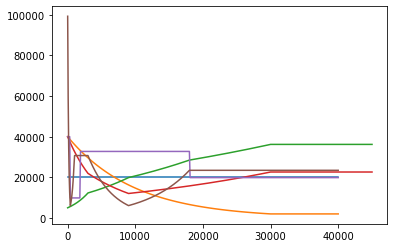

In [26]:
import statistics
import msprime
from IPython.display import SVG, display
import tsinfer
import scipy
import math
import numpy
import tskit
import io
import builtins
import sys
from tqdm.notebook import tqdm
from tskit import MISSING_DATA
import pickle
import random
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoLarsIC
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import matrix, spmatrix, sparse
from cvxopt.solvers import qp, options
from cvxopt import blas
from cvxopt import spdiag
import statsmodels
from statsmodels.nonparametric.kernel_regression import KernelReg
from scipy.signal import savgol_filter
import bisect

def find_s_s(elem, sorted_list):
    'Locate the leftmost value smaller or equal to x'
    i = bisect.bisect_left(sorted_list, elem)
    if i != 0:
        return i
    else:
        return 0
    

x1 = numpy.linspace(0,40000,100)
y1 = 20000*numpy.exp(0*x1)
M1 = [x1,y1]    
plt.plot(M1[0],M1[1])



xxx = numpy.linspace(0,30000,100)
yyy3 = 2*20000*numpy.exp(-0.0001*xxx)
xxx1 = [30000,40000]
yyy4 = [2*20000*numpy.exp(-0.0001*30000),2*20000*numpy.exp(-0.0001*30000) ]
xt= xxx.tolist()+xxx1
yt=yyy3.tolist()+yyy4
M2 = [numpy.array(xt),numpy.array(yt)]
plt.plot(M2[0],M2[1])


xx1 = numpy.linspace(0,3000,30)
yy1 = 5000*numpy.exp(xx1*(0.0003))

xx2 = numpy.linspace(3000,9000,30)
yy2 = yy1[-1]*numpy.exp( (xx2-3000)*(0.00008) )

xx3 = numpy.linspace(9000,18000,30)
yy3 = yy2[-1]*numpy.exp( (xx3-9000)* (0.00004) )

xx4 = numpy.linspace(18000,30000,30)
yy4 = yy3[-1]*numpy.exp( (xx4-18000)* (0.00002) )

xx5 = numpy.linspace(30000,45000,10)
yy5 = yy4[-1]*numpy.exp( (xx5-30000)*0 )

xt = xx1.tolist() + xx2.tolist() + xx3.tolist()+ xx4.tolist()+ xx5.tolist()
yt = yy1.tolist() + yy2.tolist() + yy3.tolist()+ yy4.tolist()+ yy5.tolist()
M3 = [numpy.array(xt),numpy.array(yt)]
plt.plot(M3[0],M3[1])



xx1 = numpy.linspace(0,3000,100)
yy1 = 40000*numpy.exp(xx1*(-0.0002))

xx2 = numpy.linspace(3000,9000,100)
yy2 = yy1[-1]*numpy.exp( (xx2-3000)*(-0.0001) )

xx3 = numpy.linspace(9000,18000,100)
yy3 = yy2[-1]*numpy.exp( (xx3-9000)* (0.00003) )

xx4 = numpy.linspace(18000,30000,100)
yy4 = yy3[-1]*numpy.exp( (xx4-18000)* (0.00003) )

xx5 = numpy.linspace(30000,45000,100)
yy5 = yy4[-1]*numpy.exp( (xx5-30000)*0 )

xt = xx1.tolist() + xx2.tolist() + xx3.tolist()+ xx4.tolist()+ xx5.tolist()
yt = yy1.tolist() + yy2.tolist() + yy3.tolist()+ yy4.tolist()+ yy5.tolist()
M4 = [numpy.array(xt),numpy.array(yt)]
plt.plot(M4[0],M4[1])


xx1 = [0,300]
yy1 = [40000,40000]
xx2 = numpy.linspace(300, 400,20)
yy2 = numpy.linspace(40000,9862,20)
xx3 = [400,1800]
yy3 = [9862,9862]
xx4 = numpy.linspace(1800,1900,20)
yy4 = numpy.linspace(9862,32748,20)
xx5 = [1900,18000]
yy5 = [32748,32748]
xx6 = numpy.linspace(18000,18100,20)
yy6 = numpy.linspace(32748,19862,20) 
xx7 = [18100,40000]
yy7 = [19862,19862]

xt = xx1+ xx2.tolist() + xx3+ xx4.tolist()+ xx5 + xx6.tolist()+ xx7
yt = yy1+ yy2.tolist() + yy3+ yy4.tolist()+ yy5 + yy6.tolist()+ yy7
M5 = [numpy.array(xt),numpy.array(yt)]
plt.plot(M5[0],M5[1])




xx1 = numpy.linspace(1,400,200)
yy1 = 100000*numpy.exp(xx1*-0.007)
xx2 = numpy.linspace(401,1000,200)
yy2 = 100000*numpy.exp(400*-0.007)*numpy.exp((xx2-400)*0.0027)
xx3 = numpy.linspace(1001,3000,200)
yy3 = 100000*numpy.exp(400*-0.007)*numpy.exp((1000-400)*0.0027)*numpy.exp((xx3-1000)*0)
xx4 = numpy.linspace(3001,9000,200)
yy4 = 100000*numpy.exp(400*-0.007)*numpy.exp((1000-400)*0.0027)*numpy.exp((3000-1000)*0)*numpy.exp((xx4-3000)*-0.00027)
xx5 = numpy.linspace(9001,18000,200)
yy5 = 100000*numpy.exp(400*-0.007)*numpy.exp((1000-400)*0.0027)*numpy.exp((3000-1000)*0)*numpy.exp((9000-3000)*-0.00027)\
    *numpy.exp((xx5-9000)*0.00015)
xx6 = numpy.linspace(18001,40000)
yy6 = 100000*numpy.exp(400*-0.007)*numpy.exp((1000-400)*0.0027)*numpy.exp((3000-1000)*0)*numpy.exp((9000-3000)*-0.00027)\
    *numpy.exp((18000-9000)*0.00015)*numpy.exp(xx6*0)

xt = xx1.tolist() + xx2.tolist() + xx3.tolist()+ xx4.tolist()+ xx5.tolist()+ xx6.tolist()
yt = yy1.tolist() + yy2.tolist() + yy3.tolist()+ yy4.tolist()+ yy5.tolist()+ yy6.tolist()
M6 = [numpy.array(xt),numpy.array(yt)]
plt.plot(M6[0],M6[1])



def ISE(x_points, invest,Nt, model):
    ISE = 0
    for i in range(len(x_points)-1):
        true_y = model[1][  min(find_s_s(x_points[i],model[0]),len(model[1])-1 ) ]
        est_y = Nt[  min(find_s_s(x_points[i], invest),len(Nt)-1 ) ]
        ISE = ISE + (x_points[i+1]-x_points[i])*(true_y-est_y)**2 
    return(ISE)





In [27]:
model = M6

name = "model6_Ntlist_approach12.dat"
file = open(name,"rb") 
Ntlist = pickle.load(file)
file.close()

name = "model6_investlist__approach12.dat"
file = open(name,"rb") 
investlist = pickle.load(file)
file.close()

ISE_list = []
x_points = numpy.linspace(1000,30000,100)


for i in range(len(Ntlist)):
    tpoint = [0]
    Npoint = []
    for j in range(len(investlist[i])):
        if j % 2 == 1:
            tpoint.append(investlist[i][j])
    for j in range(len(Ntlist[i])):
        if j % 2 == 1:
            Npoint.append(Ntlist[i][j])

    pxpoint = [0] 
    pypoint = [Npoint[0]]
    for j in range(len(tpoint)-1):
        pxpoint.append( (tpoint[j] + tpoint[j+1])/2 )
        pypoint.append( Npoint[j] )

    xp_dense = numpy.arange(0,max(pxpoint))
    yp_dense = numpy.arange(0,max(pxpoint))
    
    for k in range(1,len(xp_dense)-1):
        ind = find_s_s(xp_dense[k],pxpoint)
        firstx = pxpoint[ind-1]
        secondx = pxpoint[ind]
        firsty = pypoint[ind-1]
        secondy = pypoint[ind]
        yp_dense[k] = firsty + (secondy-firsty)/(secondx-firstx)*(xp_dense[k]-firstx)
        
        
    investlist[i] = numpy.array(xp_dense)
    Ntlist[i] = numpy.array(yp_dense)
    

num=0
for i in range(len(Ntlist)):
    num=num+1
    invest=investlist[i]
    Nt = Ntlist[i]
    ISE_list.append(ISE(x_points, invest,Nt, model))

MISE = sum(numpy.array(ISE_list))/num
RMISE = numpy.sqrt(MISE)
CI = numpy.sqrt(  (numpy.sort(ISE_list)[numpy.array([0,-1])] - MISE)/numpy.sqrt(num) + MISE   )

print("RMISE", numpy.round(RMISE/10**5,2))
print("CI", numpy.round(CI/10**5,2))


RMISE 7.68
CI [7.33 8.3 ]


2000000.0

In [ ]:
1 -362053 RMISE 14.92   
2 -409251       17.52 *****
3 -408715 RMISE 13.65

In [ ]:
1 -390733 RMISE 7.53
2 -433442 RMISE 8.33  ******
3 -438878 RMISE 12.6